<a href="https://colab.research.google.com/github/rajagupta3605/Email-Spam-Detection/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [9]:
!kaggle datasets download -d studymart/spam-email-detection-dataset


100% 2.89M/2.89M [00:00<00:00, 6.51MB/s]
100% 2.89M/2.89M [00:00<00:00, 5.62MB/s]


In [10]:
!unzip \*.zip

Archive:  spam-email-detection-dataset.zip
  inflating: emails.csv              


In [11]:
!rm *.zip

In [12]:
data = pd.read_csv("emails.csv")

In [13]:
data.shape


(5730, 110)

In [14]:
data.info

<bound method DataFrame.info of                                                    text spam Unnamed: 2  \
0     Subject: naturally irresistible your corporate...    1        NaN   
1     Subject: the stock trading gunslinger  fanny i...    1        NaN   
2     Subject: unbelievable new homes made easy  im ...    1        NaN   
3     Subject: 4 color printing special  request add...    1        NaN   
4     Subject: do not have money , get software cds ...    1        NaN   
...                                                 ...  ...        ...   
5725  Subject: re : research and development charges...    0        NaN   
5726  Subject: re : receipts from visit  jim ,  than...    0        NaN   
5727  Subject: re : enron case study update  wow ! a...    0        NaN   
5728  Subject: re : interest  david ,  please , call...    0        NaN   
5729  Subject: news : aurora 5 . 2 update  aurora ve...    0        NaN   

     Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed

In [15]:
data = data.iloc[:,:2]

In [16]:
data.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [17]:
data.isnull().sum()

text    0
spam    2
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [20]:
data.duplicated().sum()

33

In [21]:
data=data.drop_duplicates(keep="first")

In [22]:
data.shape

(5695, 2)

In [23]:
data['spam'].value_counts()

0                                                                                               4326
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [24]:
data=data[data['spam'].str.contains("however")==False]

In [25]:
data=data[data['spam'].str.contains("prabhu")==False]

In [26]:
data['spam'].value_counts()


0    4326
1    1367
Name: spam, dtype: int64

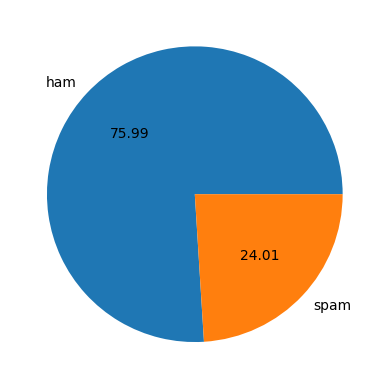

In [27]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
#data is imbalance

In [29]:
import nltk

In [30]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
data['num_characters'] = data['text'].apply(len)

In [32]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
data['num_sent'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
data.sample(5)

,text,spam,num_characters,num_words,num_sent
3209,Subject: anthony dayao happy hour - - - - - -...,0,810,218,2
5701,Subject: re : message from ken rice vince : ...,0,1566,324,16
2152,Subject: cal berkeley general presentation con...,0,3318,640,39
3059,Subject: year end 2000 performance feedback n...,0,1921,392,19
1324,Subject: viagra helps you have great sex ! ha...,1,328,62,7


In [35]:
data['spam'] = data['spam'].astype(int)

In [36]:
data[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5693.000000,5693.000000,5693.000000
mean,1543.172317,325.369225,19.359037
std,1886.930857,391.333043,35.562971
min,13.000000,3.000000,1.000000
25%,508.000000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1891.000000,402.000000,22.000000
max,31055.000000,6350.000000,1565.000000


In [37]:
data[data['spam']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4326.000000,4326.000000,4326.000000
mean,1614.353213,343.491216,19.700878
std,1741.930460,368.398707,37.601608
min,13.000000,3.000000,1.000000
25%,575.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2036.500000,440.000000,22.000000
max,31055.000000,6350.000000,1565.000000


In [38]:
data[data['spam'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,1367.000000,1367.000000,1367.000000
mean,1317.913680,268.020483,18.277249
std,2272.067352,451.762833,28.139918
min,18.000000,5.000000,1.000000
25%,402.000000,80.000000,6.000000
50%,694.000000,141.000000,11.000000
75%,1252.500000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

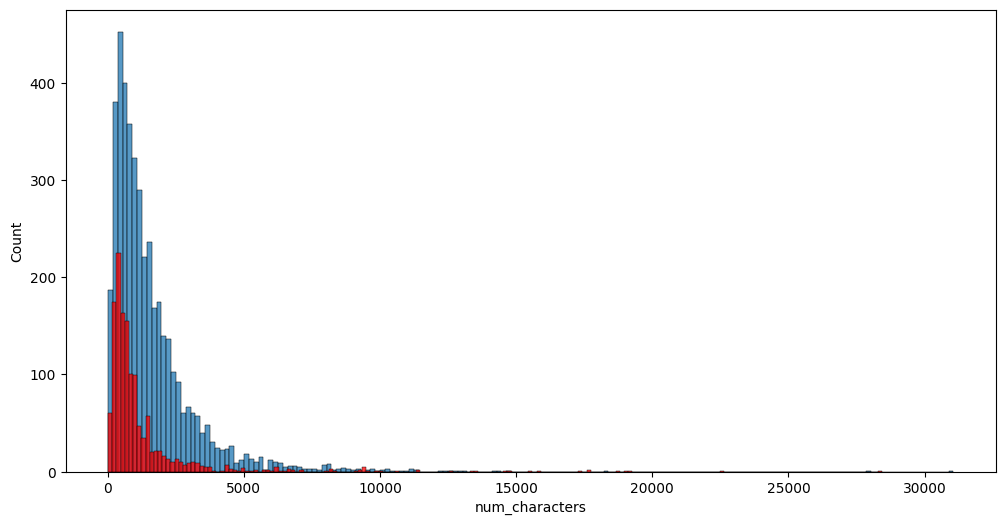

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam']==0]['num_characters'])
sns.histplot(data[data['spam']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

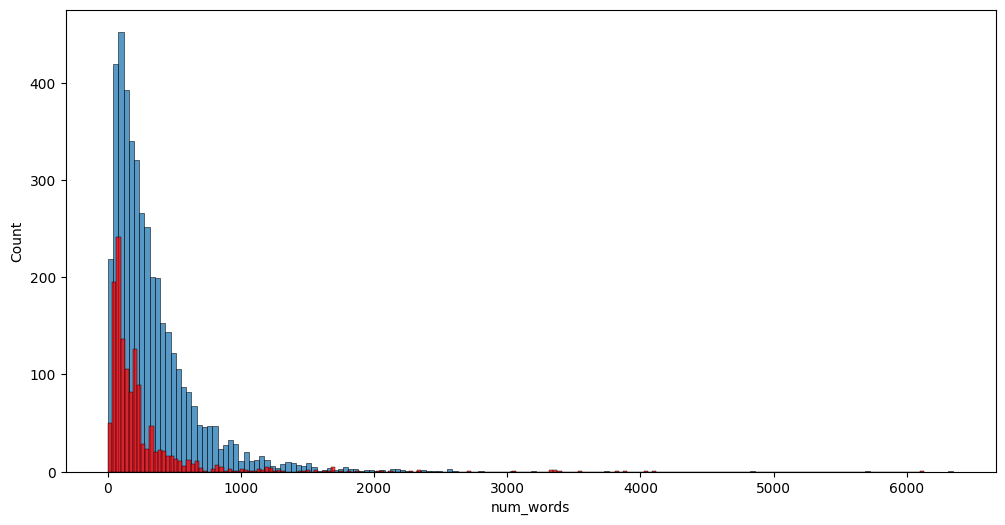

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam']==0]['num_words'])
sns.histplot(data[data['spam']==1]['num_words'],color='red')

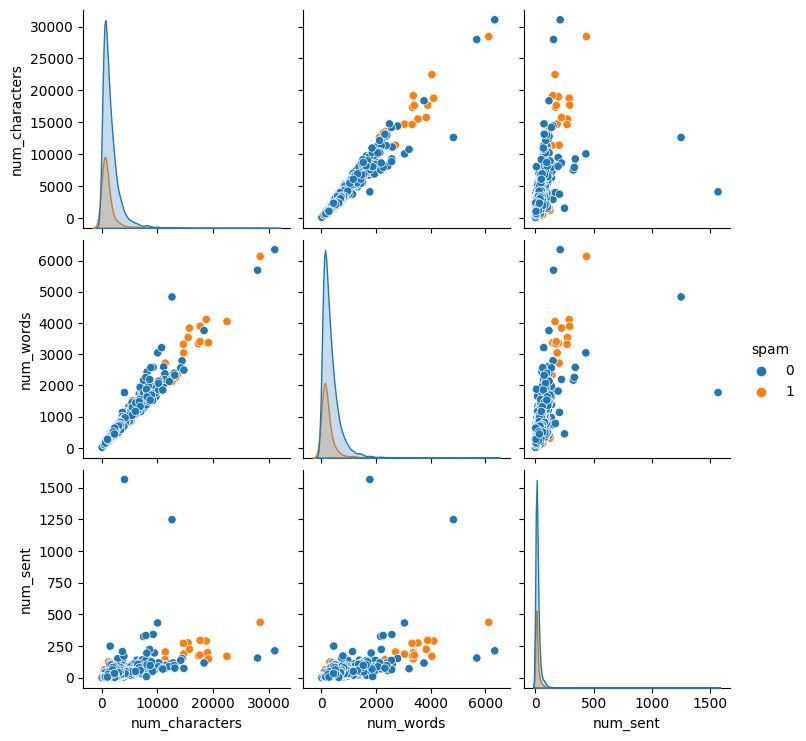

In [42]:
sns.pairplot(data,hue='spam')

<ipython-input-43-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

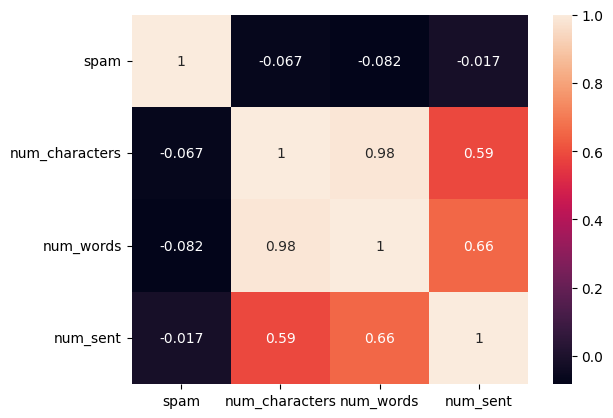

In [43]:
sns.heatmap(data.corr(),annot=True)

**3. Data preprocessing**
Lowercase.
Tokenization.
Removing special characters.
Removing stop words and punctuation- is,which has no meaning in the sentences.
Stemming-similar words to be erase or count as a one


In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [48]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [49]:
transform_text("did you like my presentation on ML?")

'like present ml'

In [50]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# ps.stem('loving')

In [51]:
data['transformed_text'] = data['text'].apply(transform_text)

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(data[data['spam']==1]['transformed_text'].str.cat(sep=" "))

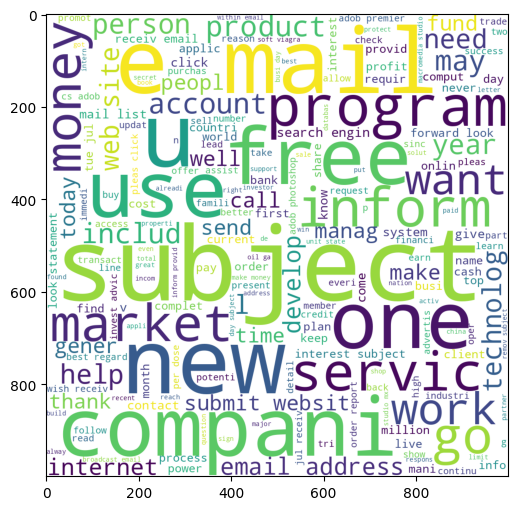

In [54]:
plt.figure(figsize=(13,6))
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(data[data['spam']==0]['transformed_text'].str.cat(sep=" "))

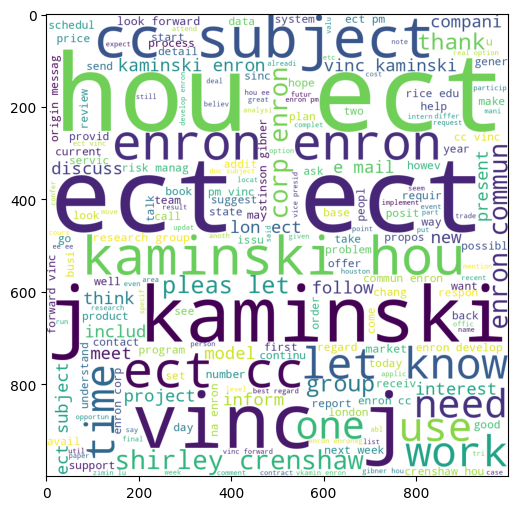

In [56]:
plt.figure(figsize=(13,6))
plt.imshow(ham_wc)

In [57]:
spam_corpus = []
for msg in data[data['spam']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [58]:
len(spam_corpus)

174588

In [59]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


In [60]:
# model design


In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=3000)
Tf = TfidfVectorizer(max_features = 3000)

In [62]:
# X = cv.fit_transform(data['transformed_text']).toarray()

In [63]:
# X.shape

In [64]:
# y = data['spam'].values

In [65]:
# y

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test, y_pred1))
# print(confusion_matrix(y_test, y_pred1))
# print(precision_score(y_test, y_pred1))

In [71]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test, y_pred2))
# print(confusion_matrix(y_test, y_pred2))
# print(precision_score(y_test, y_pred2))

In [72]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test, y_pred3))
# print(confusion_matrix(y_test, y_pred3))
# print(precision_score(y_test, y_pred3))

In [73]:
T = Tf.fit_transform(data['transformed_text']).toarray()

In [74]:
T.shape

(5693, 3000)

In [75]:
z = data['spam'].values

In [76]:
T_train,T_test,z_train,z_test = train_test_split(T,z,test_size=0.2,random_state=2)

In [77]:
gnb.fit(T_train,z_train)
z_pred1 = gnb.predict(T_test)
print(accuracy_score(z_test, z_pred1))
print(confusion_matrix(z_test, z_pred1))
print(precision_score(z_test, z_pred1))

0.9569798068481123
[[842   8]
 [ 41 248]]
0.96875


In [78]:
mnb.fit(T_train,z_train)
z_pred2 = mnb.predict(T_test)
print(accuracy_score(z_test, z_pred2))
print(confusion_matrix(z_test, z_pred2))
print(precision_score(z_test, z_pred2))

0.9841966637401229
[[845   5]
 [ 13 276]]
0.9822064056939501


In [79]:
bnb.fit(T_train,z_train)
z_pred3 = bnb.predict(T_test)
print(accuracy_score(z_test, z_pred3))
print(confusion_matrix(z_test, z_pred3))
print(precision_score(z_test, z_pred3))

0.9464442493415277
[[790  60]
 [  1 288]]
0.8275862068965517


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
from random import Random
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier( n_estimators =50,random_state=2)
bc = BaggingClassifier( n_estimators =50,random_state=2)
etc = ExtraTreesClassifier( n_estimators =50,random_state=2)
gbdt = GradientBoostingClassifier( n_estimators =50,random_state=2)
xgb= XGBClassifier( n_estimators =50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    # 'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' :xgb
    }

In [83]:
def train_classifier(clf,T_train,z_train,T_test,z_test):
  clf.fit(T_train,z_train)
  z_pred = clf.predict(T_test)
  accuracy = accuracy_score(z_test,z_pred)
  precision = precision_score(z_test,z_pred)

  return accuracy,precision

In [84]:
train_classifier(svc,T_train,z_train,T_test,z_test)

(0.9885864793678666, 0.9825174825174825)

In [85]:
accuracy_scores  = []
precision_scores = []
for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,T_train,z_train,T_test,z_test)
  print("For ",name)
  print("Accracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For  SVC
Accracy -  0.9885864793678666
Precision -  0.9825174825174825
For  KN
Accracy -  0.9789288849868305
Precision -  0.9853479853479854
For  NB
Accracy -  0.9841966637401229
Precision -  0.9822064056939501
For  DT
Accracy -  0.9280070237050044
Precision -  0.8165137614678899
For  RF
Accracy -  0.9841966637401229
Precision -  0.9927272727272727
For  AdaBoost
Accracy -  0.9736611062335382
Precision -  0.9302325581395349
For  BgC
Accracy -  0.9640035118525022
Precision -  0.9335664335664335
For  ETC
Accracy -  0.9850746268656716
Precision -  1.0
For  GBDT
Accracy -  0.9561018437225637
Precision -  0.9578544061302682
For  xgb
Accracy -  0.990342405618964
Precision -  0.976027397260274


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.985075,1.000000
4,RF,0.984197,0.992727
1,KN,0.978929,0.985348
0,SVC,0.988586,0.982517
2,NB,0.984197,0.982206
9,xgb,0.990342,0.976027
8,GBDT,0.956102,0.957854
6,BgC,0.964004,0.933566
5,AdaBoost,0.973661,0.930233
3,DT,0.928007,0.816514


In [88]:
performanece_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performanece_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.985075
1,RF,Accuracy,0.984197
2,KN,Accuracy,0.978929
3,SVC,Accuracy,0.988586
4,NB,Accuracy,0.984197
5,xgb,Accuracy,0.990342
6,GBDT,Accuracy,0.956102
7,BgC,Accuracy,0.964004
8,AdaBoost,Accuracy,0.973661
9,DT,Accuracy,0.928007


In [90]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [91]:
# new_df_scaled = performanece_df1.merge(temp_df,on='Algorithm')

In [92]:
# new_df_scaled


In [93]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_characters':accuracy_scores,'Precision_characters':precision_scores}).sort_values('Precision_characters',ascending=False)

In [94]:
new_df_characters = performanece_df1.merge(temp_df1,on='Algorithm')

In [95]:
new_df_characters


,Algorithm,variable,value,Accuracy_characters,Precision_characters
0,ETC,Accuracy,0.985075,0.985075,1.000000
1,ETC,Precision,1.000000,0.985075,1.000000
2,RF,Accuracy,0.984197,0.984197,0.992727
3,RF,Precision,0.992727,0.984197,0.992727
4,KN,Accuracy,0.978929,0.978929,0.985348
5,KN,Precision,0.985348,0.978929,0.985348
6,SVC,Accuracy,0.988586,0.988586,0.982517
7,SVC,Precision,0.982517,0.988586,0.982517
8,NB,Accuracy,0.984197,0.984197,0.982206
9,NB,Precision,0.982206,0.984197,0.982206


In [96]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# T = scaler.fit_transform(T)

In [97]:
# T= np.hstack((T,data['num_characters'].values.reshape(-1,1)))

In [98]:
## Applyong Stacking
# estimators=[('svm',svc),('nb',mnb),('et',etc)]
# final_estimator=RandomForestClassifier()

In [99]:
# from sklearn.ensemble import StackingClassifier

In [100]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [101]:
# clf.fit(T_train,z_train)
# z_pred = clf.predict(T_test)
# print("Accuracy",accuracy_score(z_test,z_pred))
# print("Precision",precision_score(z_test,z_pred))

In [102]:
# Voting Classifier
RF = RandomForestClassifier()
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting = VotingClassifier(estimators=[('rf',RF),('nb',mnb),('et',etc)],voting='soft')

In [104]:
voting.fit(T_train,z_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
z_pred = voting.predict(T_test)
print("Accuracy",accuracy_score(z_test,z_pred))
print("Precision",precision_score(z_test,z_pred))

Accuracy 0.990342405618964
Precision 1.0


In [122]:
input_email ='''A vulnerability has been identified in the Apple Facetime mobile applications that allow an attacker to record calls and vodeos from your mobile device eithout your knowledge.
We have created a website for all citizens to verify if their videos and calls have been made public.'To perform the verification, please use the following link:'''

In [123]:
#1. preprocess
transformed_email = transform_text(input_email)

In [124]:
# 2. vectorizer
vector_input = Tf.transform([transformed_email])

In [125]:
# 3. predict
result = voting.predict(vector_input)[0]

In [126]:
# 4. predict
if result == 1:
  print("Spam")
else:
  print("Not spam")

Spam


In [106]:
# import pickle
# pickle.dump(Tf,open('vectorizer.pkl','wb'))
# pickle.dump(voting,open('model.pkl','wb'))